<a href="https://colab.research.google.com/github/limited-fion/ee3-ml/blob/main/Fion_ML_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

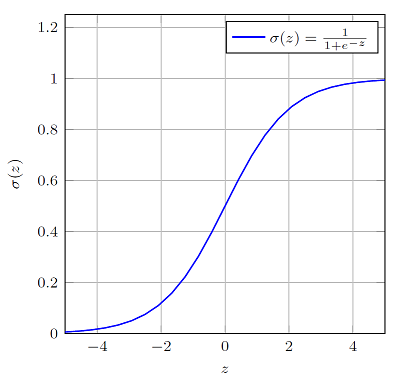

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

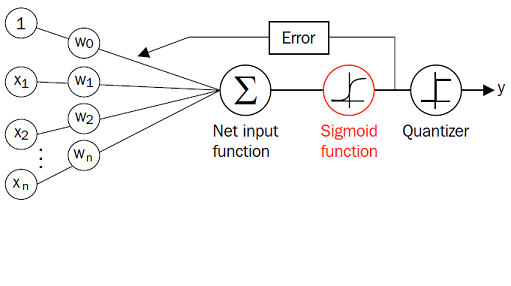

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$. The predicted probability can be converted into a binary outcome via a quantizer (unit step function):

\begin{equation}
y_{pred} = \begin{cases} 
      1 & \sigma(z)\geq 0.5 \\
      0 & otherwise 
   \end{cases}
\end{equation}


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N}\sum -y_{n}\cdot\log\left(y_{pred}\right)-\left(1-y\right)\cdot\log\left(1-y_{pred}\right)
\end{equation}
where $y_{n}$ is the label  for training example $n$, $y_{pred}$ is the predicted class.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

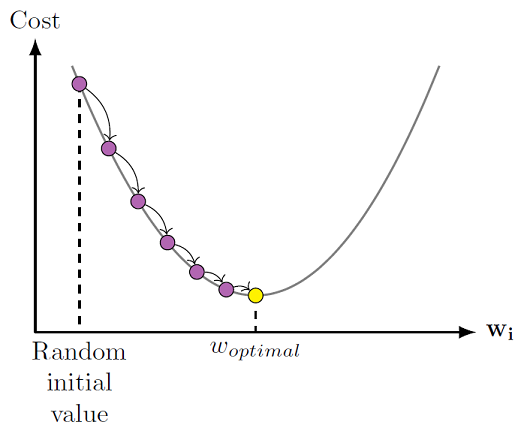


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015

# Problem
We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager as fm, pyplot as plt

!wget https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
!wget https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf 

font_files = fm.findSystemFonts()

# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)

fm.fontManager.ttflist += fm.createFontList(['Times New Roman.ttf'])

# Use your new font on all your plots.
plt.rc('font', family='serif')


--2022-11-19 22:33:32--  https://github.com/trishume/OpenTuringCompiler/blob/master/stdlib-sfml/fonts/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Times New Roman.ttf.2’

Times New Roman.ttf     [ <=>                ] 138.55K  --.-KB/s    in 0.08s   

2022-11-19 22:33:32 (1.78 MB/s) - ‘Times New Roman.ttf.2’ saved [141872]

--2022-11-19 22:33:32--  https://github.com/matomo-org/travis-scripts/blob/master/fonts/Arial.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Arial.ttf.2’

Arial.ttf.2             [ <=>                ] 139.54K  --.-KB/s    in 0.07s   

2022-11-19 22:33:33 (1.87 MB/s) - ‘Arial.ttf.2’ saved [142894]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [3]:
iris = datasets.load_iris()

In [4]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

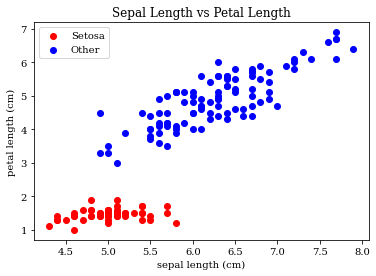

In [7]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other') 
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [8]:
## HELPER FUNCTIONS ##

def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

def fit(alpha, num_iter, X, y):   
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []    
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)
                
        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

(150, 3)
(150,)
iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.39716904888478627 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.23820942493735064 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.16748536782748724 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.1457605274625624 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.10521991405430549 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights:

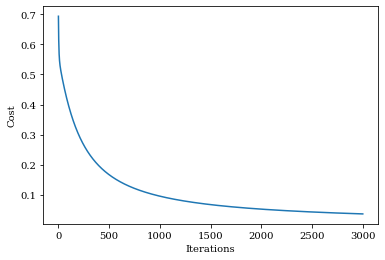

In [9]:
alpha = 0.01
num_iter = 3000
print(X.shape)
print(y.shape)
model_weights = fit(alpha, num_iter, X,y)

In [10]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')


## Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


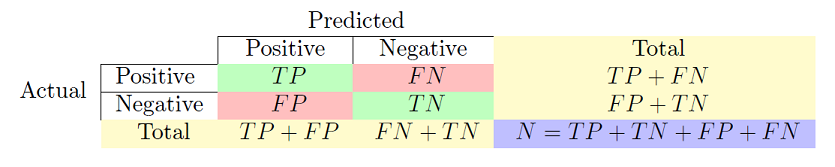

In [11]:
def compute_confusion_matrix(true, pred):
  
    num_cls = len(np.unique(true)) # Number of classes 
    result = np.zeros((num_cls, num_cls))
    
    for i in range(len(true)):
        result[true[i]][pred[i]] += 1
    
    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


# Coursework:

## Task 1:

In the above code, we tested the performance of the network on the same training dataset, which should not be the case in evaluating the algorithm. Adjust the code such that the data is divided into two sets; namely, training and testing. The training dataset will be $80\%$ of the size of the original data and the other $20\%$ is for the test data. Include in your report:
- Discuss the importance of having two datasets for evaluating the algorithm.
- The code you used to divide the original data into training and testing datasets.
- The confusion matrix and total accuracy of the algorithm using the testing dataset.

**Discuss the importance of having two datasets for evaluating the algorithm.**

> Prevent overfitting

In [12]:
def training_set(data):
  n = 0.8*data.shape[0]
  return data[0:int(n)]

def test_set(data):
  n = 0.8*data.shape[0]
  return data[int(n):data.shape[0]]

In [13]:
import seaborn as sns

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00175    0.01288333 0.01425833] 	
iteration: 11 	 cost: 0.5430647088545143 	 weights: [0.0070961  0.06850666 0.10514896] 	
iteration: 21 	 cost: 0.5126255134829388 	 weights: [0.00351991 0.07032229 0.15770678] 	
iteration: 31 	 cost: 0.49323159625487134 	 weights: [-0.00250001  0.05710952  0.19884886] 	
iteration: 41 	 cost: 0.4759624266890749 	 weights: [-0.00924626  0.03906464  0.23552717] 	
iteration: 51 	 cost: 0.4597112236292991 	 weights: [-0.01614599  0.01957826  0.27003774] 	
iteration: 61 	 cost: 0.444289747899188 	 weights: [-2.29897077e-02 -1.05984456e-04  3.03231168e-01] 	
iteration: 71 	 cost: 0.4296378051031438 	 weights: [-0.02969945 -0.01951813  0.33544393] 	
iteration: 81 	 cost: 0.4157144782376336 	 weights: [-0.03624772 -0.03848391  0.36681852] 	
iteration: 91 	 cost: 0.4024822858365314 	 weights: [-0.04262695 -0.05694539  0.39742229] 	
iteration: 101 	 cost: 0.3899050273368593 	 weights: [-0.04883754 -0.07489099 

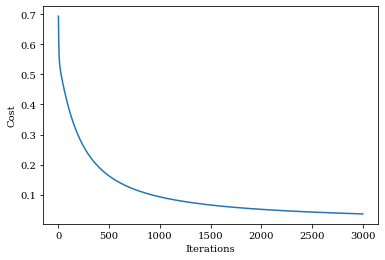

Confusion matrix result: 
[[11.  0.]
 [ 0. 19.]]
accuracy = 100.00%


In [41]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 0.01
num_iter = 3000

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

[Text(0.5, 1.0, 'Iris-Setosa vs other classes')]

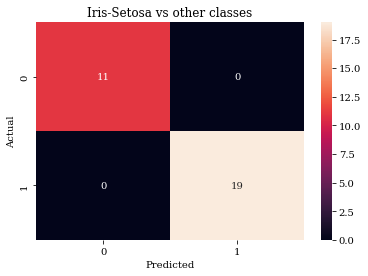

In [43]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")
ax.set(title="Iris-Setosa vs other classes")

## Task 2:

The code used here is for classifying Iris-Setosa vs other classes. Rewrite the code such that you can classify Iris-Versicolor vs other classes and Iris-Virginica vs other classes such that for each case you divide the dataset into training and testing. Include in your report:
- The code you used to adjust the dataset for each case.
- Report the weights for each case.
- Compare the performance of the network for each case and justify why the performance for some cases is better than the other.

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00158333 0.00887083 0.00405417] 	
iteration: 11 	 cost: 0.6555582265692176 	 weights: [0.010889   0.05852732 0.01822195] 	
iteration: 21 	 cost: 0.6505037565287414 	 weights: [0.01514244 0.07815607 0.01246803] 	
iteration: 31 	 cost: 0.6478831417847261 	 weights: [0.01798988 0.08963235 0.00169831] 	
iteration: 41 	 cost: 0.6455750823328569 	 weights: [ 0.02038571  0.09866566 -0.01022085] 	
iteration: 51 	 cost: 0.6434065810210501 	 weights: [ 0.02259758  0.1068509  -0.02222101] 	
iteration: 61 	 cost: 0.641357020594651 	 weights: [ 0.02470335  0.11464664 -0.03400562] 	
iteration: 71 	 cost: 0.6394184956183669 	 weights: [ 0.02672692  0.12218851 -0.04549733] 	
iteration: 81 	 cost: 0.6375844987008825 	 weights: [ 0.02867669  0.12951962 -0.05668134] 	
iteration: 91 	 cost: 0.6358489829566236 	 weights: [ 0.03055662  0.13665646 -0.06756052] 	
iteration: 101 	 cost: 0.6342062680819784 	 weights: [ 0.03236931  0.14360777 -0.07814261] 	
i

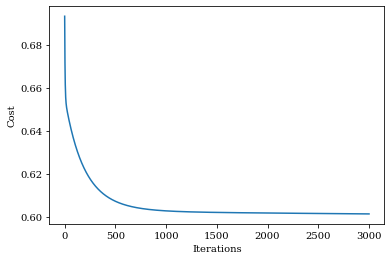

Confusion matrix result: 
[[ 0.  9.]
 [ 2. 19.]]
accuracy = 63.33%


In [45]:
# Versicolor is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 1, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 0.01
num_iter = 3000

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

[Text(0.5, 1.0, 'Iris-Versicolor vs other classes')]

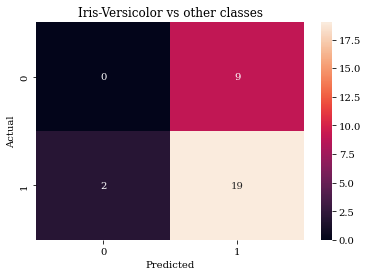

In [46]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")
ax.set(title="Iris-Versicolor vs other classes")

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 0.0015      0.00605    -0.00070833] 	
iteration: 11 	 cost: 0.6685840612760479 	 weights: [ 0.01319743  0.04703233 -0.02048836] 	
iteration: 21 	 cost: 0.6525688220347258 	 weights: [ 0.02225721  0.07284653 -0.04931449] 	
iteration: 31 	 cost: 0.6379432051777452 	 weights: [ 0.03049227  0.09441286 -0.07967831] 	
iteration: 41 	 cost: 0.6242033820143545 	 weights: [ 0.03836122  0.11447381 -0.10973285] 	
iteration: 51 	 cost: 0.6112637680232292 	 weights: [ 0.0459861   0.13374013 -0.13903759] 	
iteration: 61 	 cost: 0.5990684237570439 	 weights: [ 0.05340389  0.15240898 -0.1675073 ] 	
iteration: 71 	 cost: 0.5875663552817495 	 weights: [ 0.06062984  0.17054679 -0.19514653] 	
iteration: 81 	 cost: 0.5767099165753848 	 weights: [ 0.06767353  0.18818632 -0.22198202] 	
iteration: 91 	 cost: 0.5664546302293992 	 weights: [ 0.07454291  0.20535118 -0.24804543] 	
iteration: 101 	 cost: 0.5567590651456555 	 weights: [ 0.08124531  0.22206207 -0.

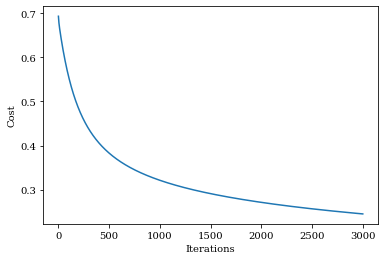

Confusion matrix result: 
[[ 8.  0.]
 [ 3. 19.]]
accuracy = 90.00%


In [48]:
# Virginica is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 2, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 0.01
num_iter = 3000

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

AttributeError: ignored

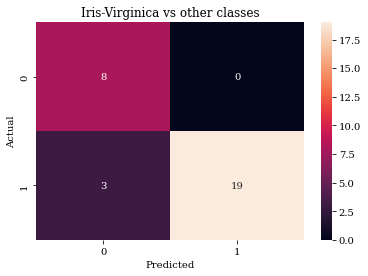

In [54]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")
ax.set(title="Iris-Virginica vs other classes")

* Report the weights for each case.
  > Setosa vs others: [-0.46220835 -1.24962467  2.6494851 ]

  > Versicolor vs others : [ 0.01396     0.47094146 -0.52961653] 

  > Virginica vs others : [ 0.77050754  1.6253733  -2.23231374] 

* Compare the performance of the network for each case and justify why the performance for some cases is better than the other.

  > The higher the BCE - binary cross entropy, the lower the accuracy

## Task 3:

In this tutorial you were introduced to the parameter $\alpha$ or learning rate, we chose a value 0f $0.01$ for our algorithm. Invetigate the effect of choosing different $\alpha$'s for the Iris-Setosa vs all classifier. Include in your report:

- Different values of $\alpha$ (e.g. 0.0001, 0.1, 1, 100). Note: Could print loss more frequently to observe initial behaviour.
- Run the code for these values and report the performance of the network.
- Include the cost vs. epochs graph, accuracy of test data and confusion matrix.
- Discuss on your own words why the performance of the algorithm changed and what is the effect of learning rate on the gradient descent.

iteration: 1 	 cost: 0.6931471805599435 	 weights: [1.75000000e-05 1.30833333e-04 1.42458333e-04] 	
iteration: 11 	 cost: 0.6894197798226095 	 weights: [0.00019068 0.00142812 0.0015593 ] 	
iteration: 21 	 cost: 0.685784266890856 	 weights: [0.0003606  0.00270551 0.00296218] 	
iteration: 31 	 cost: 0.6822382478403328 	 weights: [0.00052728 0.00396326 0.00435128] 	
iteration: 41 	 cost: 0.6787793821842182 	 weights: [0.00069078 0.00520165 0.0057268 ] 	
iteration: 51 	 cost: 0.6754053825428507 	 weights: [0.00085114 0.00642092 0.00708891] 	
iteration: 61 	 cost: 0.6721140142404641 	 weights: [0.0010084  0.00762134 0.00843779] 	
iteration: 71 	 cost: 0.6689030948355037 	 weights: [0.0011626  0.00880316 0.00977363] 	
iteration: 81 	 cost: 0.6657704935906982 	 weights: [0.00131379 0.00996664 0.01109658] 	
iteration: 91 	 cost: 0.6627141308887577 	 weights: [0.00146201 0.01111204 0.01240685] 	
iteration: 101 	 cost: 0.6597319775992662 	 weights: [0.00160729 0.01223959 0.01370459] 	
iteration:

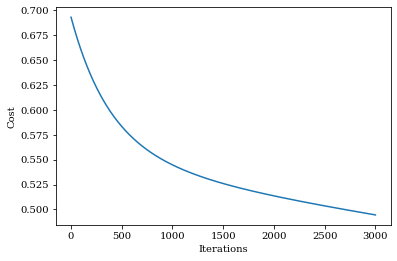

Confusion matrix result: 
[[ 0. 11.]
 [ 0. 19.]]
accuracy = 63.33%


In [55]:
# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 0.0001
num_iter = 3000

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

[Text(34.0, 0.5, 'Actual'), Text(0.5, 16.0, 'Predicted')]

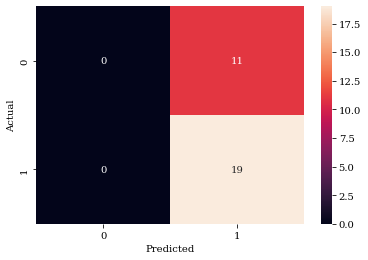

In [56]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.01583333 0.12120833 0.13704167] 	
iteration: 11 	 cost: 0.3982808749560954 	 weights: [-0.05960114 -0.10202605  0.4582114 ] 	
iteration: 21 	 cost: 0.299454799644388 	 weights: [-0.11430149 -0.25319589  0.72068682] 	
iteration: 31 	 cost: 0.23750216726176265 	 weights: [-0.15722519 -0.37003421  0.93104066] 	
iteration: 41 	 cost: 0.19612986098623666 	 weights: [-0.19212732 -0.46399569  1.10445463] 	
iteration: 51 	 cost: 0.16690137817394807 	 weights: [-0.22136996 -0.54207757  1.25115088] 	
iteration: 61 	 cost: 0.14528288131862713 	 weights: [-0.24646194 -0.60865783  1.37792299] 	
iteration: 71 	 cost: 0.12869455220672726 	 weights: [-0.2684025  -0.66659108  1.48938672] 	
iteration: 81 	 cost: 0.11558389183014776 	 weights: [-0.28787898 -0.71781721  1.58877444] 	
iteration: 91 	 cost: 0.10496917201140545 	 weights: [-0.30538092 -0.76370423  1.67841859] 	
iteration: 101 	 cost: 0.09620260813302753 	 weights: [-0.3212677  -0.80524821

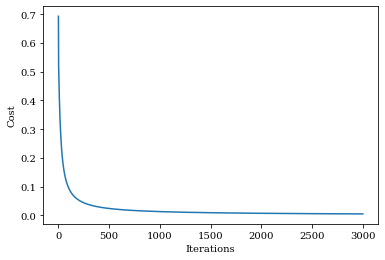

Confusion matrix result: 
[[ 9.  0.]
 [ 0. 21.]]
accuracy = 100.00%


In [57]:
# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 0.1
num_iter = 3000

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

[Text(34.0, 0.5, 'Actual'), Text(0.5, 16.0, 'Predicted')]

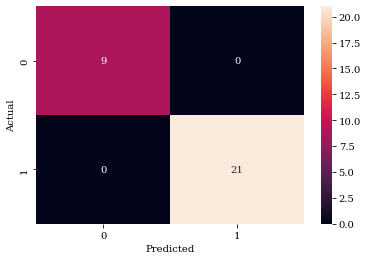

In [58]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")

In [20]:
def fit(alpha, num_iter, X, y):   
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []    
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)
                
        if i % 10 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.14166667 1.08625    1.30458333] 	
iteration: 11 	 cost: 0.015442601988825062 	 weights: [-0.64661289 -1.69969291  3.58269283] 	
iteration: 21 	 cost: 0.013890666810497453 	 weights: [-0.66265103 -1.7400834   3.69394956] 	
iteration: 31 	 cost: 0.012717053769902835 	 weights: [-0.67864306 -1.78482636  3.79039311] 	
iteration: 41 	 cost: 0.011740327826466375 	 weights: [-0.69317828 -1.82561386  3.8784811 ] 	


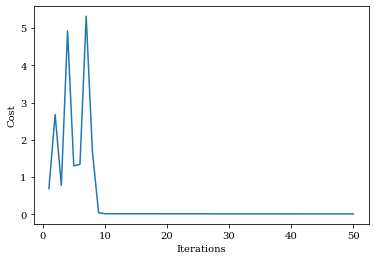

Confusion matrix result: 
[[ 7.  0.]
 [ 0. 23.]]
accuracy = 100.00%


In [59]:
# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 1
num_iter = 50

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

[Text(34.0, 0.5, 'Actual'), Text(0.5, 16.0, 'Predicted')]

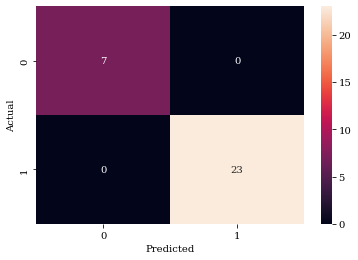

In [60]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")

iteration: 1 	 cost: 0.6931471805599435 	 weights: [ 15.         113.04166667 131.54166667] 	
iteration: 11 	 cost: -1.1102230246251561e-15 	 weights: [ -66.90722001 -165.53004254  398.46142759] 	
iteration: 21 	 cost: -1.1102230246251561e-15 	 weights: [ -66.90722001 -165.53004254  398.46142759] 	
iteration: 31 	 cost: -1.1102230246251561e-15 	 weights: [ -66.90722001 -165.53004254  398.46142759] 	
iteration: 41 	 cost: -1.1102230246251561e-15 	 weights: [ -66.90722001 -165.53004254  398.46142759] 	


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


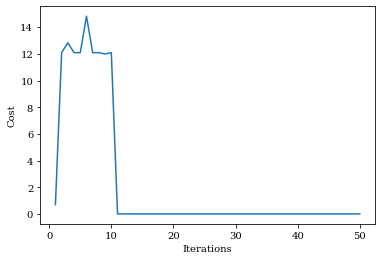

Confusion matrix result: 
[[ 8.  0.]
 [ 0. 22.]]
accuracy = 100.00%


In [65]:
# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row) 
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

Z = np.insert(X, 3, y, axis=1)

np.random.shuffle(Z)

alpha = 100
num_iter = 50

model_weights = fit(alpha, num_iter, training_set(Z)[:, :3], training_set(Z)[:, 3])

predictions = predict(test_set(Z)[:, :3], model_weights)
pred = predictions.astype('int')
true = test_set(Z)[:, 3].astype('int')

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements 
print('accuracy = {:0.2f}%'.format(accuracy*100))

[Text(34.0, 0.5, 'Actual'), Text(0.5, 16.0, 'Predicted')]

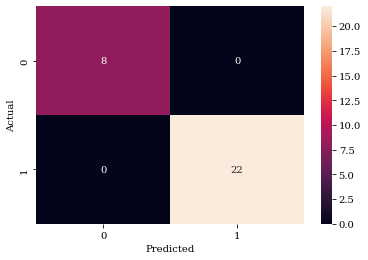

In [66]:
ax = sns.heatmap(conf_matrix, annot=True)
ax.set(ylabel="Actual", xlabel="Predicted")

**Discuss on your own words why the performance of the algorithm changed and what is the effect of learning rate on the gradient descent.**